In [14]:
import os, shutil

In [15]:
# 训练集数据切分
ori_train_path = os.getcwd() + r'\train' # 获取当前工作目录路径

In [18]:
div_train_path = os.getcwd() + r'\data_use'  # 切分后的数据集存储在
os.mkdir(div_train_path)

FileExistsError: [WinError 183] 当文件已存在时，无法创建该文件。: 'D:\\proj\\jpter\\ai_overview_as_final\\data_use'

In [19]:
# # 训练、验证、测试数据集的目录
train_dir = os.path.join(div_train_path, 'train')
os.mkdir(train_dir)

validation_dir = os.path.join(div_train_path, 'validation')
os.mkdir(validation_dir)

test_dir = os.path.join(div_train_path, 'test')
os.mkdir(test_dir)

# 猫训练图片所在目录
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)

# 狗训练图片所在目录
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

# 猫验证图片所在目录
validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)

# 狗验证数据集所在目录
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

# 猫测试数据集所在目录
test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)

# 狗测试数据集所在目录
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

In [20]:
# 复制1000张当做训练集train
GoogLeNet
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    shutil.copyfile(os.path.join(ori_train_path, fname), os.path.join(train_cats_dir, fname)) # cp file1 file2

In [21]:
# 复制500张当做验证集valiation

fnames = ['cat.{}.jpg'.format(i) for i in range(1000,1500)]
for fname in fnames:
    shutil.copyfile(os.path.join(ori_train_path, fname), os.path.join(validation_cats_dir, fname))

In [22]:
# 复制500张当做测试集test

fnames = ['cat.{}.jpg'.format(i) for i in range(1500,2000)]
for fname in fnames:
    shutil.copyfile(os.path.join(ori_train_path, fname), os.path.join(test_cats_dir, fname))

In [23]:
# 针对dog的3个同样操作

# 复制1000张当做训练集train
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    shutil.copyfile(os.path.join(ori_train_path, fname), os.path.join(train_dogs_dir, fname))
    
# 复制500张当做验证集valiation
fnames = ['dog.{}.jpg'.format(i) for i in range(1000,1500)]
for fname in fnames:
    src = os.path.join(current_dir[0] + "/train", fname)
    shutil.copyfile(os.path.join(ori_train_path, fname), os.path.join(validation_dogs_dir, fname))
    
# 复制500张当做测试集test
fnames = ['dog.{}.jpg'.format(i) for i in range(1500,2000)]
for fname in fnames:
    shutil.copyfile(os.path.join(ori_train_path, fname), os.path.join(test_dogs_dir, fname))


In [26]:
from keras import layers
from keras import models

# keras的序贯模型
model = models.Sequential()

# 卷积层 卷积核是3*3 激活函数relu
# relu means Linear rectification function
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))

# 最大池化层
model.add(layers.MaxPooling2D((2, 2)))

# 卷积层 卷积核2*2 激活函数relu
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# 最大池化层
model.add(layers.MaxPooling2D((2, 2)))

# 卷积层 卷积核是3*3 激活函数relu
model.add(layers.Conv2D(128, (3, 3), activation='relu'))

#最大池化层
model.add(layers.MaxPooling2D((2, 2)))
#卷积层 卷积核是3*3 激活函数relu
model.add(layers.Conv2D(128, (3, 3), activation='relu'))

#最大池化层
model.add(layers.MaxPooling2D((2, 2)))

#flatten层 用于将多维的输入一维化 用于卷积层和全连接层的过渡
model.add(layers.Flatten())

#全连接 激活函数relu
model.add(layers.Dense(512, activation='relu'))

#全连接 激活函数sigmoid
model.add(layers.Dense(1, activation='sigmoid'))

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [29]:
from tensorflow.keras import optimizers

model.compile(loss="binary_crossentropy", optimizer=optimizers.RMSprop(learning_rate=1e-4), metrics=["acc"])

In [30]:
# 读取文件
# 将文件JPEG文件转成RGB像素网络
# 像素网格转成浮点数张量
# keras.preprocessing.image.ImageDataGenerator 迭代用
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)  # 1:255 缩放
test_datagen = ImageDataGenerator(rescale=1./255)


In [31]:
train_generator = train_datagen.flow_from_directory(
    train_dir,  # 训练目录
    target_size=(150,150),  # 图像大小设置
    batch_size=20,
    class_mode="binary"  # 因为损失函数是binary_crossentropy 所以使用二元标签
)


Found 2000 images belonging to 2 classes.


In [32]:
validation_generator = test_datagen.flow_from_directory(
    validation_dir,  # 验证目录
    target_size=(150,150),
    batch_size=20,
    class_mode="binary" 
)


Found 1000 images belonging to 2 classes.


In [34]:
# 查看预处理后图片的大小
i_times=0
for data_batch, labels_batch in train_generator:
    i_times += 1
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    if i_times >= 10:
        break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)
data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)
data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)
data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)
data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)
data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)
data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)
data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)
data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)
data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


In [36]:
history = model.fit(
    train_generator,
    steps_per_epoch=100,
    epochs=30,  # 迭代次数
    validation_data=validation_generator,
    validation_steps=50 
)

Epoch 1/30
100/100 [==============================] - 43s 431ms/step - loss: 0.6772 - acc: 0.5780 - val_loss: 0.6549 - val_acc: 0.6190
Epoch 2/30
100/100 [==============================] - 39s 385ms/step - loss: 0.6469 - acc: 0.6130 - val_loss: 0.6370 - val_acc: 0.6310
Epoch 3/30
100/100 [==============================] - 37s 371ms/step - loss: 0.5994 - acc: 0.6725 - val_loss: 0.6134 - val_acc: 0.6520
Epoch 4/30
100/100 [==============================] - 40s 397ms/step - loss: 0.5594 - acc: 0.7135 - val_loss: 0.6066 - val_acc: 0.6740
Epoch 5/30
100/100 [==============================] - 37s 368ms/step - loss: 0.5305 - acc: 0.7275 - val_loss: 0.5918 - val_acc: 0.6780
Epoch 6/30
100/100 [==============================] - 37s 369ms/step - loss: 0.5108 - acc: 0.7430 - val_loss: 0.5890 - val_acc: 0.6900
Epoch 7/30
100/100 [==============================] - 39s 389ms/step - loss: 0.4817 - acc: 0.7580 - val_loss: 0.5788 - val_acc: 0.6900
Epoch 8/30
100/100 [==============================] - 4

In [37]:
# 保存模型
model.save("cats_and_dogs.h5")


In [38]:
import matplotlib.pyplot as plt

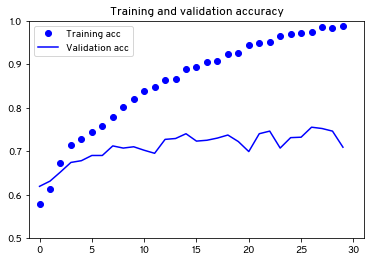

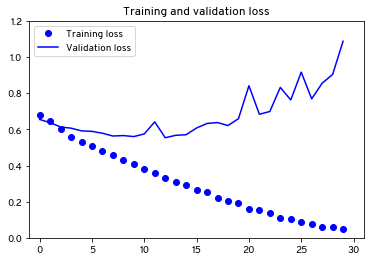

In [41]:
acc = history.history['acc']  # history.history is a dict type
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.rcParams['font.sans-serif'] = 'Overpass'

plt.figure()
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.xlim([-1,31])
plt.ylim([0.5,1])
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.xlim([-1,31])
plt.ylim([0,1.2])
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [42]:
# 数据增强 解决过拟合
# 随着迭代损失变大

datagen = ImageDataGenerator(
    rotation_range=40,  # 旋转
    width_shift_range=0.2,  # 截图
    height_shift_range=0.2,
    shear_range=0.2,  # 随机错切变换的角度
    zoom_range=0.2,  # 随机缩放的角度
    horizontal_flip=True,  # 随机将一半图像进行水平翻转
    fill_mode="nearest"  # 填充新创建像素的方法
)

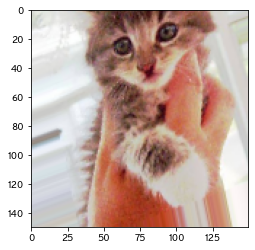

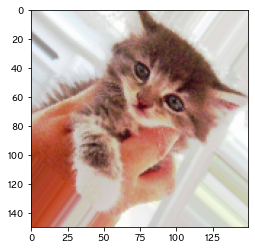

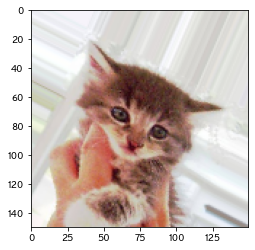

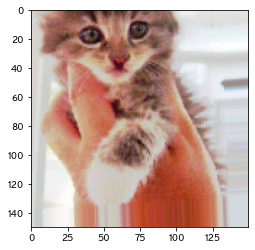

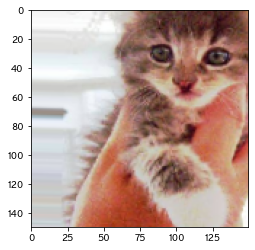

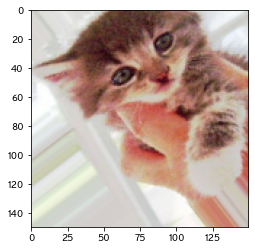

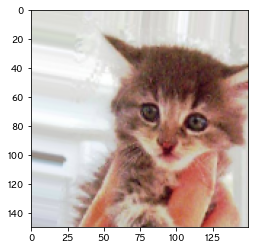

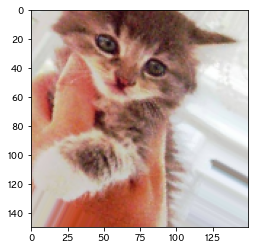

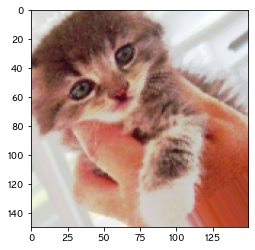

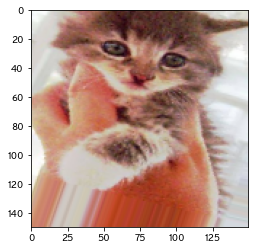

In [50]:
from keras.preprocessing import image
import tensorflow as tf
# 旧版中 keras 的 image 有 load_img img_to_array array_to_img
# 此处从 tf.keras.preprocessing.image 替换这三个函数 其实有少许出入但没有其他替代方案了

fnames = [os.path.join(train_cats_dir,fname) for fname in os.listdir(train_cats_dir)]  # check 猫的图像
img_path = fnames[3]

# 读取图片 并调整大小 转换为数组
img = tf.keras.preprocessing.image.load_img(img_path, target_size=(150,150))  
x = tf.keras.preprocessing.image.img_to_array(img)

# shape转成(1,150,150,3)
x = x.reshape((1,) + x.shape)

i = 0
for batch in datagen.flow(x, batch_size=1):  # 生成随机变换后的图像批量
    plt.figure()   
    imgplot = plt.imshow(tf.keras.preprocessing.image.array_to_img(batch[0]))
    i += 1
    if i == 10:
        break
        
plt.show()

In [52]:
# import tensorflow as tf
# from keras import layers 
# from keras import models

model = models.Sequential()
model.add(tf.keras.layers.Conv2D(32,(3,3),activation="relu",
                               input_shape=(150,150,3)))
model.add(tf.keras.layers.MaxPooling2D((2,2)))

model.add(tf.keras.layers.Conv2D(64,(3,3),activation="relu"))
model.add(tf.keras.layers.MaxPooling2D((2,2)))

model.add(tf.keras.layers.Conv2D(128,(3,3),activation="relu"))
model.add(tf.keras.layers.MaxPooling2D((2,2)))

model.add(tf.keras.layers.Conv2D(128,(3,3),activation="relu"))
model.add(tf.keras.layers.MaxPooling2D((2,2)))  # 

model.add(tf.keras.layers.Flatten())

# 添加内容 
model.add(tf.keras.layers.Dropout(0.5))

model.add(tf.keras.layers.Dense(512, activation="relu"))
model.add(tf.keras.layers.Dense(1, activation="sigmoid"))

model.compile(loss="binary_crossentropy", optimizer=optimizers.RMSprop(learning_rate=1e-4), metrics=["acc"])


In [55]:
# 增强训练数据
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1.0 / 255)

train_generator = train_datagen.flow_from_directory(
    train_dir, 
    target_size=(150,150),
    batch_size=32,
    class_mode="binary"
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150,150),
    batch_size=32,
    class_mode="binary"
)


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [57]:
history = model.fit(
    train_generator,
    steps_per_epoch=63,  # steps_per_epoch=2000/32
    epochs=100,  # so annoying
    validation_data=validation_generator,
    validation_steps=32  # validation_steps=1000/32
)

Epoch 1/100
63/63 [==============================] - 38s 608ms/step - loss: 0.6760 - acc: 0.5810 - val_loss: 0.6623 - val_acc: 0.5830
Epoch 2/100
63/63 [==============================] - 39s 626ms/step - loss: 0.6695 - acc: 0.5760 - val_loss: 0.6550 - val_acc: 0.5970
Epoch 3/100
63/63 [==============================] - 39s 624ms/step - loss: 0.6548 - acc: 0.6075 - val_loss: 0.6407 - val_acc: 0.6130
Epoch 4/100
63/63 [==============================] - 38s 607ms/step - loss: 0.6460 - acc: 0.6215 - val_loss: 0.6169 - val_acc: 0.6450
Epoch 5/100
63/63 [==============================] - 38s 602ms/step - loss: 0.6322 - acc: 0.6435 - val_loss: 0.6454 - val_acc: 0.6030
Epoch 6/100
63/63 [==============================] - 40s 633ms/step - loss: 0.6195 - acc: 0.6435 - val_loss: 0.6367 - val_acc: 0.6130
Epoch 7/100
63/63 [==============================] - 39s 616ms/step - loss: 0.6111 - acc: 0.6570 - val_loss: 0.5942 - val_acc: 0.6750
Epoch 8/100
63/63 [==============================] - 39s 612ms

Epoch 62/100
63/63 [==============================] - 41s 655ms/step - loss: 0.4597 - acc: 0.7820 - val_loss: 0.4483 - val_acc: 0.7800
Epoch 63/100
63/63 [==============================] - 39s 612ms/step - loss: 0.4661 - acc: 0.7685 - val_loss: 0.4513 - val_acc: 0.7940
Epoch 64/100
63/63 [==============================] - 39s 614ms/step - loss: 0.4436 - acc: 0.7930 - val_loss: 0.5009 - val_acc: 0.7580
Epoch 65/100
63/63 [==============================] - 41s 653ms/step - loss: 0.4451 - acc: 0.7940 - val_loss: 0.4411 - val_acc: 0.7920
Epoch 66/100
63/63 [==============================] - 44s 692ms/step - loss: 0.4461 - acc: 0.7950 - val_loss: 0.4779 - val_acc: 0.7660
Epoch 67/100
63/63 [==============================] - 44s 692ms/step - loss: 0.4405 - acc: 0.7905 - val_loss: 0.4635 - val_acc: 0.7910
Epoch 68/100
63/63 [==============================] - 46s 733ms/step - loss: 0.4430 - acc: 0.7925 - val_loss: 0.4771 - val_acc: 0.7700
Epoch 69/100
63/63 [==============================] - 4

In [58]:
model.save("cats_and_dogs_2.h5")

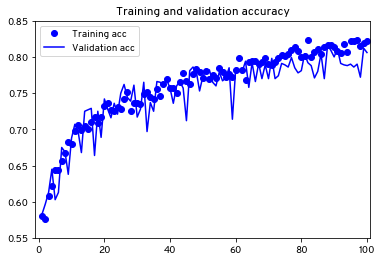

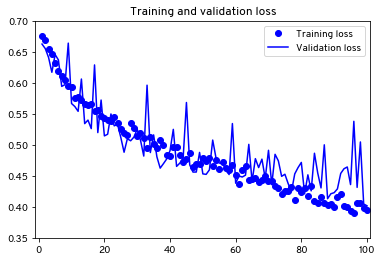

In [66]:
# 再画一次

acc = history.history['acc']  # history.history is a dict type
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)  # 和上面一次相比更多了就是说

plt.figure()
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.xlim([-1,101])
plt.ylim([0.55,0.85])
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.xlim([-1,101])
plt.ylim([0.35,0.7])
plt.title('Training and validation loss')
plt.legend()
plt.show()